In [39]:
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

from scipy.stats import truncnorm, beta

from fit_betas import beta_MoM

## Model

For $k=1,...,1000$ and $i=1,...,n_k$,

$$\alpha_k, \beta_k \sim D$$

$$x_{i,k} \sim \mathsf{Beta}(\alpha_k, \beta_k)$$

**Goal**: Estimate $D$ given samples $x_{i,k}$

We first assume that $D$ is a product of Betas (I chose Beta because we want a distribution that is truncated at 0)

$$D(\alpha, \beta) = \mathsf{Beta}(\alpha \mid a_1, b_1) \mathsf{Beta}(\beta \mid a_2, b_2)$$

In [93]:
num_classes = 1000
n_k = 10

a_1 = 1.5
b_1 = 3

a_2 = 2
b_2 = 1.5

In [94]:
# Visualize D
xmin = 0.001
xmax = 2
ymin = 0.001
ymax = 2

bins = 100

D_density = np.zeros((bins, bins))

for i, x in enumerate(np.linspace(xmin, xmax, bins)):
    for j, y in enumerate(np.linspace(ymin, ymax, bins)):
        D_density[i,j] = beta.pdf(x, a_1, b_1) * beta.pdf(y, a_2, b_2)

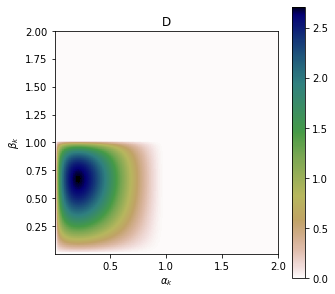

In [95]:
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(np.rot90(D_density), 
#                vmin=0, vmax=10, 
               cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
ax.set_xlabel('$\\alpha_k$')
ax.set_ylabel('$\\beta_k$')
ax.set_title('D')
fig.colorbar(im)
plt.show()

In [124]:
alpha_mean = a_1/(a_1+b_1)
beta_mean = a_2/(a_2+b_2)
print(f'Mean of prior: {alpha_mean:.3f}, {beta_mean:.3f}')

Mean: 0.333, 0.571


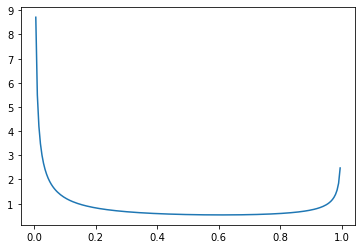

In [135]:
xs = np.linspace(0,1,200)
plt.plot(xs, beta.pdf(xs, alpha_mean, beta_mean))

## Sample data

In [96]:
np.random.seed(0)

class_labels = np.zeros((num_classes * n_k,))
true_alphas = np.zeros((num_classes,))
true_betas = np.zeros((num_classes,))
X = np.zeros((num_classes * n_k,)) 

for k in range(num_classes):
    
    # Sample alpha_k, beta_k
    true_alphas[k] = np.random.beta(a_1, b_1)
    true_betas[k] = np.random.beta(a_2, b_2)
    
    class_labels[k*n_k : (k+1)*n_k] = k
    
    # Sample Xs
    X[k*n_k : (k+1)*n_k] = np.random.beta(true_alphas[k], true_betas[k], size=(n_k,))

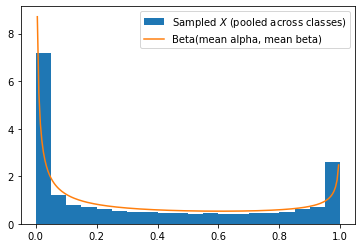

In [139]:
# Visualize data
plt.hist(X, bins=20, density=True, label='Sampled $X$ (pooled across classes)')
plt.plot(xs, beta.pdf(xs, alpha_mean, beta_mean), label='Beta(mean alpha, mean beta)') # Beta distribution defined by mean of prior distributions on alpha and beta
plt.legend()
plt.show()

It seems like the distribution of the pooled $X$s closely follows $\mathsf{Beta}(\bar{\alpha}, \bar{\beta})$ where $\bar{\alpha}$ is the mean of the prior distribution on $\alpha$ and $\bar{\beta}$ is the mean of the prior distribution on $\beta$. Is this generally true? Can we show this mathematically? 

Can we use this to help us estimate the priors? 

## Attempt to recover D

In [97]:
est_alphas = np.zeros((num_classes,))
est_betas = np.zeros((num_classes,))

for k in range(num_classes):
    class_k_scores = X[class_labels==k]
    
    est_alpha, est_beta = beta_MoM(class_k_scores)
    est_alphas[k], est_betas[k] = est_alpha, est_beta
    
    print(f"[Class {k}] Est. params: {est_alpha:.3f}, {est_beta:.3f} ||", 
          f"True params: {true_alphas[k]:.3f}, {true_betas[k]:.3f}")

[Class 0] Est. params: 0.305, 1.058 || True params: 0.560, 0.932
[Class 1] Est. params: 0.578, 0.488 || True params: 0.373, 0.758
[Class 2] Est. params: 0.184, 0.369 || True params: 0.215, 0.709
[Class 3] Est. params: 1.370, 0.534 || True params: 0.554, 0.282
[Class 4] Est. params: 0.796, 0.472 || True params: 0.510, 0.867
[Class 5] Est. params: 0.207, 0.211 || True params: 0.261, 0.208
[Class 6] Est. params: 0.053, 0.852 || True params: 0.061, 0.803
[Class 7] Est. params: 0.044, 0.148 || True params: 0.108, 0.250
[Class 8] Est. params: 1.068, 0.992 || True params: 0.373, 0.670
[Class 9] Est. params: 0.235, 0.734 || True params: 0.165, 0.205
[Class 10] Est. params: 0.113, 5.724 || True params: 0.040, 0.476
[Class 11] Est. params: 0.121, 0.220 || True params: 0.086, 0.177
[Class 12] Est. params: 0.130, 0.590 || True params: 0.189, 0.732
[Class 13] Est. params: 0.135, 0.448 || True params: 0.110, 0.906
[Class 14] Est. params: 0.252, 0.625 || True params: 0.356, 0.582
[Class 15] Est. para

[Class 432] Est. params: 0.109, 0.525 || True params: 0.142, 0.470
[Class 433] Est. params: 0.116, 0.217 || True params: 0.115, 0.331
[Class 434] Est. params: 1.023, 2.364 || True params: 0.567, 0.903
[Class 435] Est. params: 0.292, 0.423 || True params: 0.427, 0.614
[Class 436] Est. params: 0.057, 0.256 || True params: 0.125, 0.452
[Class 437] Est. params: 0.409, 0.279 || True params: 0.784, 0.339
[Class 438] Est. params: 0.793, 0.496 || True params: 0.334, 0.300
[Class 439] Est. params: 0.198, 0.313 || True params: 0.103, 0.531
[Class 440] Est. params: 0.107, 26.160 || True params: 0.060, 0.652
[Class 441] Est. params: 0.408, 0.383 || True params: 0.630, 0.671
[Class 442] Est. params: 0.455, 0.368 || True params: 0.498, 0.685
[Class 443] Est. params: 0.339, 1.222 || True params: 0.224, 0.891
[Class 444] Est. params: 0.321, 0.785 || True params: 0.283, 0.661
[Class 445] Est. params: 0.394, 0.731 || True params: 0.536, 0.486
[Class 446] Est. params: 0.007, 0.067 || True params: 0.150, 

[Class 870] Est. params: 1.032, 0.366 || True params: 0.729, 0.542
[Class 871] Est. params: 0.358, 1.202 || True params: 0.245, 0.594
[Class 872] Est. params: 0.208, 0.774 || True params: 0.344, 0.954
[Class 873] Est. params: 1.244, 2.769 || True params: 0.415, 0.702
[Class 874] Est. params: 0.311, 5.902 || True params: 0.120, 0.693
[Class 875] Est. params: 0.577, 0.566 || True params: 0.644, 0.731
[Class 876] Est. params: 0.284, 0.476 || True params: 0.474, 0.571
[Class 877] Est. params: 0.460, 1.505 || True params: 0.235, 0.584
[Class 878] Est. params: 0.191, 0.576 || True params: 0.181, 0.359
[Class 879] Est. params: 0.432, 0.912 || True params: 0.671, 0.912
[Class 880] Est. params: 0.185, 0.148 || True params: 0.206, 0.090
[Class 881] Est. params: 0.788, 0.702 || True params: 0.502, 0.531
[Class 882] Est. params: 0.234, 3.737 || True params: 0.144, 0.559
[Class 883] Est. params: 0.458, 1.372 || True params: 0.362, 0.877
[Class 884] Est. params: 0.624, 0.393 || True params: 0.450, 0

There are some crazy outliers: for $n_k=5$, we get `[Class 392] Est. params: 0.250, 810287808301229146112.000 || True params: 0.004, 0.539`. I exclude these when plotting

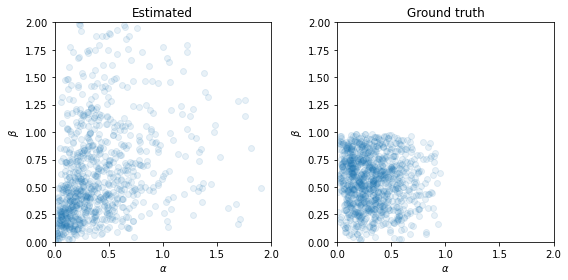

In [99]:
# Plot estimated alpha, beta pairs and compare to ground truth
fig, axs = plt.subplots(1,2, figsize=(8,4))

axs[0].scatter(est_alphas, est_betas, alpha=0.1)
axs[0].set_title('Estimated')
axs[1].scatter(true_alphas, true_betas, alpha=0.1)
axs[1].set_title('Ground truth')

for ax in axs:
    ax.set_xlim(0,2)
    ax.set_ylim(0,2)
    ax.set_xlabel('$\\alpha$')
    ax.set_ylabel('$\\beta$')
    
plt.tight_layout()

I want to understand the noise model of $\widehat{\alpha_k}, \widehat{\beta_k}$ given $\alpha_k, \beta_k$. I will compute and plot the error
$$(\epsilon_k^{\alpha}, \epsilon_k^{\beta}) = (\widehat{\alpha_k} - \alpha_k, \widehat{\beta_k} - \beta_k) $$

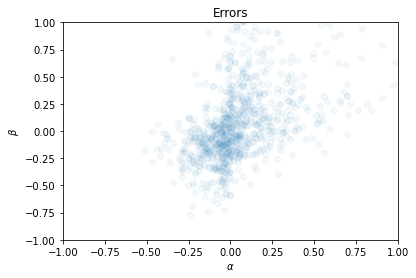

In [109]:
alpha_errors = est_alphas - true_alphas
beta_errors = est_betas - true_betas

plt.scatter(alpha_errors, beta_errors, alpha=0.05)
plt.title('Errors')
plt.xlabel('$\\alpha$')
plt.ylabel('$\\beta$')

plt.ylim(-1,1)
plt.xlim(-1,1)

plt.show()

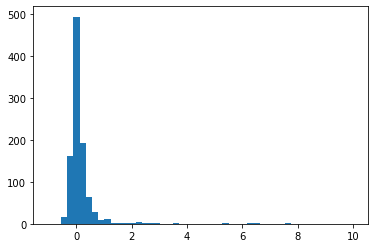

In [119]:
plt.hist(alpha_errors, bins=np.linspace(-1,10,50))
plt.show()

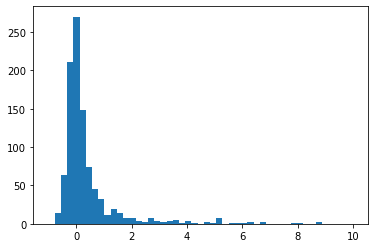

In [120]:
plt.hist(beta_errors, bins=np.linspace(-1,10,50))
plt.show()

Archived (broken):

<!-- ## Model

For $k=1,...,1000$ and $i=1,...,n_k$,

$$\alpha_k, \beta_k \sim D$$

$$x_{i,k} \sim \mathsf{Beta}(\alpha_k, \beta_k)$$

**Goal**: Estimate $D$ given samples $x_{i,k}$

We first assume that $D$ is a product of Gaussians truncated to $\mathbb{R}_{>0}$:

$$D(\alpha, \beta) = \mathcal{N}(\alpha \mid \mu_{\alpha}, \sigma_{\alpha}^2) \mathcal{N}(\beta \mid \mu_{\beta}, \sigma_{\beta}^2)$$ -->

In [5]:
# num_classes = 1000
# n_k = 5

# mu_a = 0.1
# mu_b = 0.4

# sigma_a = 0.1
# sigma_b = 0.2

In [18]:
# # Visualize D
# xmin = -0.2
# xmax = 2
# ymin = -0.2
# ymax = 2

# bins = 100

# D_density = np.zeros((bins, bins))

# for i, x in enumerate(np.linspace(xmin, xmax, bins)):
#     for j, y in enumerate(np.linspace(ymin, ymax, bins)):
#         D_density[i,j] = truncnorm.pdf(x, 0, np.inf, loc=mu_a, scale=sigma_a) * truncnorm.pdf(y, 0, np.inf, loc=mu_b, scale=sigma_b)

In [38]:
# fig, ax = plt.subplots(figsize=(5,5))
# im = ax.imshow(np.rot90(D_density), 
# #                vmin=0, vmax=10, 
#                cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
# ax.set_xlabel('$\\alpha_k$')
# ax.set_ylabel('$\\beta_k$')
# ax.set_title('D')
# fig.colorbar(im)
# plt.show()

In [6]:
# class_labels = np.zeros((num_classes * n_k,))
# true_alphas = np.zeros((num_classes,))
# true_betas = np.zeros((num_classes,))
# X = np.zeros((num_classes * n_k,)) 

In [35]:
# for k in range(num_classes):
    
#     # Sample alpha_k, beta_k
#     true_alphas[k] = np.random.normal(mu_a, sigma_a)
#     true_betas[k] = np.random.normal(mu_b, sigma_b)
    
#     class_labels[k*n_k : (k+1)*n_k] = k
    
#     # Sample Xs
#     X[k*n_k : (k+1)*n_k] = np.random.beta(true_alphas[k], true_betas[k])